In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score, roc_auc_score, log_loss, roc_curve, auc, precision_score, plot_roc_curve, max_error

In [3]:
import sys
print(sys.prefix)

A:\Anaconda


In [3]:
def metric_battery(model, X, y, prob=False):
    prediction = model.predict(X)
    mean_error = mean_squared_error(y, prediction, squared=False)
    evs = explained_variance_score(y, prediction, multioutput='variance_weighted')
    r2 = r2_score(y, prediction)
    cross_val = cross_val_score(model, X, y, cv=3)
    max_ = max_error(y, prediction) # meaningless in this context
    
#     precision = precision_score(y, prediction)
    
    fpr, tpr, thresholds = roc_curve(y, prediction)
    auc_ = auc(fpr, tpr)
    
    result = {
        "                r2 score": r2,
        "              mean error": mean_error,
        "explained variance score": evs,
        "                variance": np.var(prediction),
        " 3 fold cross validation": cross_val.mean(),
        "                     auc": auc_,
#         "               max error": max_,
#         "               precision": precision,
    }
    
    if prob:
        pred_prob = model.predict_proba(X)
        roc_auc = roc_auc_score(y, pred_prob[:, 1])
        
        result.update({"           roc_auc_score": roc_auc,})
    
        plot_curve = plot_roc_curve(model, X, y)
    
    return result

In [4]:
df = pd.read_csv("...")

In [5]:
def direction_label(row):
    x = row['OneDayDifferenceLabel']
    
    if x > 0:
        return 1
    elif x < 0:
        return -1
    return 0
df['DirectionLabel'] = df.apply(lambda row: direction_label(row), axis=1)

In [6]:
def color_label(row):
    x = row['OneDayDifferenceLabel']
    
    if x > 0:
        return "blue"
    elif x < 0:
        return "red"
    return "yellow"
df['color'] = df.apply(lambda row: color_label(row), axis=1)

In [6]:
def cut_label(row):
    x = row['OneDayDifferenceLabel']
    
    if x >= 3:
        return 1
    elif x <= -3:
        return -1
    return 0
df['cut'] = df.apply(lambda row: cut_label(row), axis=1)

In [7]:
df = df[df.color != 'yellow']

In [9]:
df.columns.to_list()

['date',
 'stock',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'Alpha101',
 'liquidity',
 'OneDayDifferenceLabel',
 'rsi',
 'BollingerBands',
 'aroon',
 'FastStochasticOscillator',
 'IchimokuKinkoHyo',
 'TrueRange',
 'MovingAverageConvergenceDivergenceSignal',
 'AVGPRICE',
 'MEDPRICE',
 'TYPPRICE',
 'WCLPRICE',
 'OBV',
 'APO',
 'AROONOSC',
 'BOP',
 'CCI',
 'MOM',
 'PPO',
 'ROC',
 'ROCP',
 'ROCR',
 'ROCR100',
 'ULTOSC',
 'WILLR',
 'BETA',
 'CORREL',
 'LINEARREG',
 'LINEARREG_ANGLE',
 'LINEARREG_INTERCEPT',
 'LINEARREG_SLOPE',
 'STDDEV',
 'TSF',
 'VAR',
 'DEMA',
 'MA',
 'MIDPOINT',
 'MIDPRICE',
 'SAR',
 'SAREXT',
 'SMA',
 'TEMA',
 'TRIMA',
 'WMA',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'C

In [8]:
a = 'ROC'
b = 'CORREL'
c = 'PPO'

work_space = df[[a, b, c, 'color', 'DirectionLabel']]

# this is cutting the data
work_space = work_space[
    (work_space['CORREL'] < 0.7) & (work_space['CORREL'] > -0.5) & ((work_space['ROC'] < -50) | (work_space['ROC'] > 50))
]

In [9]:
work_space

,ROC,CORREL,PPO,color,DirectionLabel
87761,-52.024169,0.193750,3.261942,blue,1
207007,116.619002,0.305177,9.116221,blue,1
207008,115.248897,0.290952,6.026947,red,-1
207011,97.643901,0.276533,12.501388,red,-1
207016,-54.338754,0.273850,8.389039,red,-1
...,...,...,...,...,...
732947,95.029991,0.172846,-10.402932,red,-1
732948,94.780614,0.211361,-10.164648,red,-1
732952,103.102136,0.203142,-3.386224,red,-1
732955,106.397695,0.223394,1.046855,blue,1


In [70]:
tops = work_space[(work_space['FastStochasticOscillator'] > 80)]
nots = work_space[(work_space['FastStochasticOscillator'] < 20)]

In [71]:
tops.shape

(3385, 4)

In [72]:
nots.shape

(2687, 4)

In [73]:
tops_ = tops[tops["color"] == "red"]
tops_.shape[0] / tops.shape[0]

0.5994091580502215

In [74]:
nots_ = nots[nots["color"] == "blue"]
nots_.shape[0] / nots.shape[0]

0.6788239672497208

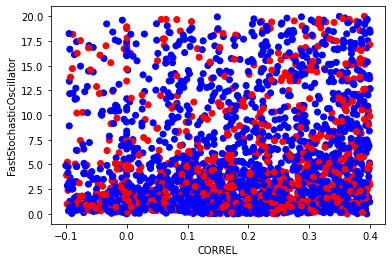

In [22]:
plt.xlabel(a)
plt.ylabel(b)
plt.scatter(work_space[a], work_space[b], c=work_space['color'])

In [10]:
X = work_space[[a, b, c]]
y = work_space['DirectionLabel']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
from sklearn import svm

support_vector = svm.SVC(probability=True)
support_vector.fit(X_train, y_train)

{'                r2 score': -0.05942872614051686,
 '              mean error': 1.0286590955626267,
 'explained variance score': -0.03827670231487712,
 '                variance': 0.9675162249864793,
 ' 3 fold cross validation': 0.7354436816679378,
 '                     auc': 0.7326045756057941,
 '           roc_auc_score': 0.7453634763774198}

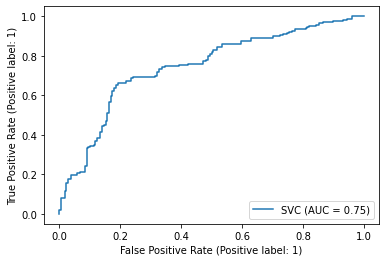

In [12]:
metric_battery(support_vector, X_test, y_test, prob=True)

{'                r2 score': -0.0048371712767409925,
 '              mean error': 1.0014566650110448,
 'explained variance score': 6.812917291143528e-05,
 '                variance': 0.9870717133167305,
 ' 3 fold cross validation': 0.7493262140859396,
 '                     auc': 0.7472578007902984,
 '           roc_auc_score': 0.7703365581141844}

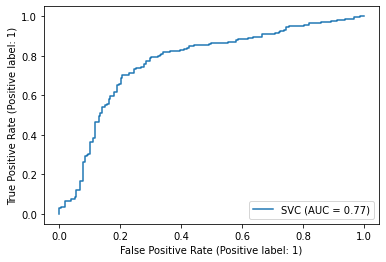

In [13]:
metric_battery(support_vector, X_train, y_train, prob=True)

In [14]:
from sklearn.neighbors import NearestCentroid
centroid = NearestCentroid()
centroid.fit(X_train, y_train)

NearestCentroid()

In [15]:
metric_battery(centroid, X_test, y_test)

{'                r2 score': -0.05942872614051686,
 '              mean error': 1.0286590955626267,
 'explained variance score': -0.03827670231487712,
 '                variance': 0.9675162249864793,
 ' 3 fold cross validation': 0.7354436816679378,
 '                     auc': 0.7326045756057941}

In [16]:
metric_battery(centroid, X_train, y_train)

{'                r2 score': -0.0048371712767409925,
 '              mean error': 1.0014566650110448,
 'explained variance score': 6.812917291143528e-05,
 '                variance': 0.9870717133167305,
 ' 3 fold cross validation': 0.7493262140859396,
 '                     auc': 0.7472578007902984}

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNeighbors = KNeighborsClassifier(n_neighbors=25)
KNeighbors.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

{'                r2 score': -0.05942872614051686,
 '              mean error': 1.0286590955626267,
 'explained variance score': -0.03827670231487712,
 '                variance': 0.9675162249864793,
 ' 3 fold cross validation': 0.7267480294940251,
 '                     auc': 0.7326045756057941,
 '           roc_auc_score': 0.7441958846622444}

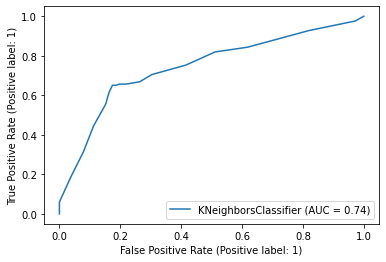

In [18]:
metric_battery(KNeighbors, X_test, y_test, prob=True)

{'                r2 score': 0.006846981877639657,
 '              mean error': 0.9956172177673852,
 'explained variance score': 0.010968796838805805,
 '                variance': 0.9883636919990821,
 ' 3 fold cross validation': 0.7493262140859396,
 '                     auc': 0.7503065812781032,
 '           roc_auc_score': 0.7959531271290367}

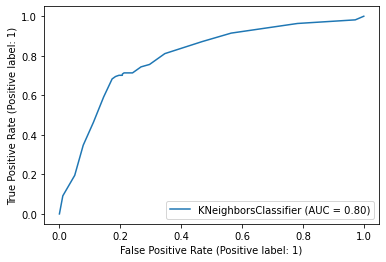

In [19]:
metric_battery(KNeighbors, X_train, y_train, prob=True)

In [20]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=3)
Kmeans.fit(X_train, y_train)

KMeans(n_clusters=3)

In [21]:
metric_battery(Kmeans, X_test, y_test, prob=False)

{'                r2 score': -1.0984838229321774,
 '              mean error': 1.4477327904548338,
 'explained variance score': -0.7073829023961007,
 '                variance': 0.2418790562466198,
 ' 3 fold cross validation': -12762.075104195248,
 '                     auc': 0.26739542439420605}

In [22]:
metric_battery(Kmeans, X_train, y_train, prob=False)

{'                r2 score': -1.1177527592315037,
 '              mean error': 1.4538578417117354,
 'explained variance score': -0.75284439296907,
 '                variance': 0.2522588377291774,
 ' 3 fold cross validation': -110117.89906918914,
 '                     auc': 0.2519076168415315}

<AxesSubplot:>

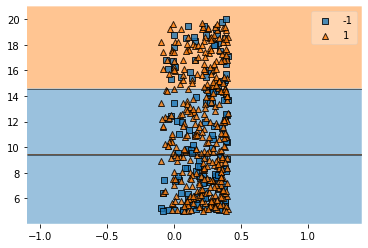

In [29]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_train.to_numpy(), y=y_train.to_numpy(), clf=Kmeans)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=3)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3)

{'                r2 score': -0.4203330174631106,
 '              mean error': 1.1910519095164538,
 'explained variance score': -0.418167050223365,
 '                variance': 0.9933747971876689,
 ' 3 fold cross validation': 0.6598779557589626,
 '                     auc': 0.6441045079193177,
 '           roc_auc_score': 0.6771016650873156}

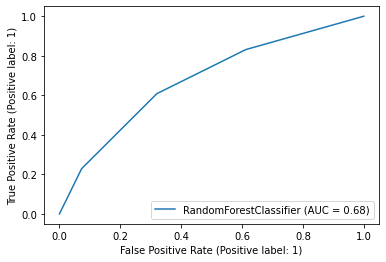

In [24]:
metric_battery(rf, X_test, y_test, prob=True)

{'                r2 score': 0.6728437116773401,
 '              mean error': 0.5714285714285714,
 'explained variance score': 0.6733887450606348,
 '                variance': 0.995503574191026,
 ' 3 fold cross validation': 0.6414187643020596,
 '                     auc': 0.9176999591224961,
 '           roc_auc_score': 0.9631591497479222}

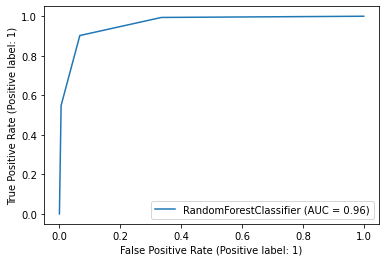

In [25]:
metric_battery(rf, X_train, y_train, prob=True)

<AxesSubplot:>

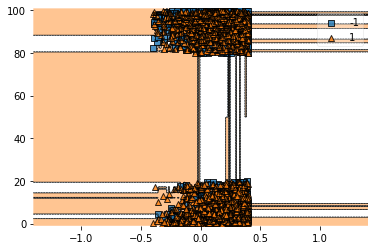

In [51]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X_train.to_numpy(), y=y_train.to_numpy(), clf=rf)

In [26]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=500)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=500)

{'                r2 score': -0.5134696087721669,
 '              mean error': 1.2294827802684933,
 'explained variance score': -0.5129281169622302,
 '                variance': 0.9966197944835047,
 ' 3 fold cross validation': 0.578515128400712,
 '                     auc': 0.6212264789495059,
 '           roc_auc_score': 0.6622444835521861}

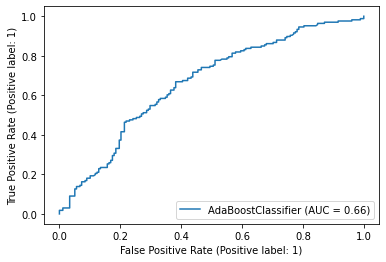

In [27]:
metric_battery(ada, X_test, y_test, prob=True)

{'                r2 score': 0.7780010900667665,
 '              mean error': 0.47071684059880803,
 'explained variance score': 0.7796702548031066,
 '                variance': 0.992851617948304,
 ' 3 fold cross validation': 0.6208746503941011,
 '                     auc': 0.9436060771222238,
 '           roc_auc_score': 0.9930508243629922}

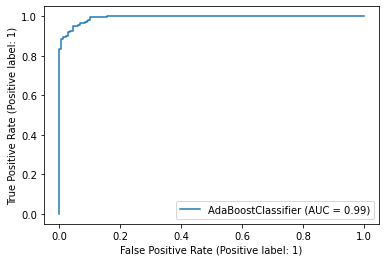

In [28]:
metric_battery(ada, X_train, y_train, prob=True)